In [2]:
import numpy as np
import pandas as pd
from LogisticRegression import LogisticRegression
from KNN import KNN
from Kfold import Kfold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

data_missing = np.any(X == '?', axis=1)
X_features = X[~data_missing]
y_target = y[~data_missing]


In [3]:
ohe = OneHotEncoder(dtype=np.int32)
X_new = ohe.fit_transform(X_features[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]).toarray()
X_new.shape
X_new_final = np.hstack((X_features[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].values,X_new))

In [4]:
y = np.where(y_target == '>50K', 1, 0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new_final)
X = X_scaled


In [5]:
logReg = LogisticRegression(0.01,1000)

In [6]:
kNearest = KNN(5)

In [7]:
def evaluate_acc(X,y,model,thres):
    accuracy = Kfold.kFoldTest(X,y,model,thres)
    return accuracy

The accuracy of the logistic regression is:  (0.8168173987941431, 1000)
The accuracy of the KNN Classifier is:  0.8021551724137931
optimal k is:  13


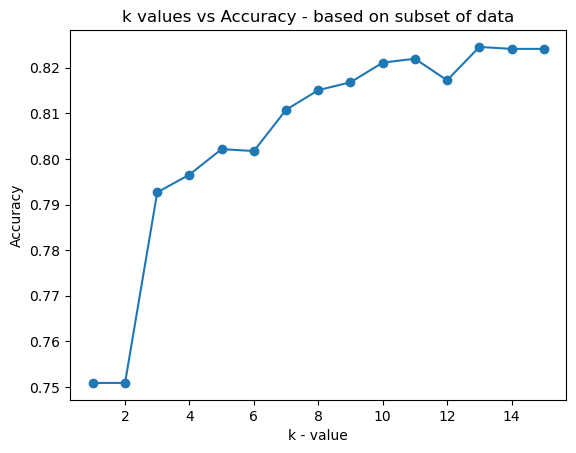

In [8]:
accuracyLog = evaluate_acc(X,y,logReg,0.001)

print("The accuracy of the logistic regression is: ",accuracyLog)

# Since KNN was taking extremely long to run, i had to do reduce the number of features and rows in order to find the best k in the KNN algorithm
bestFeatures = SelectKBest(score_func=f_classif, k=5)
y2 = y.ravel()
X_new = bestFeatures.fit_transform(X, y2)

subsetIndexes = np.random.choice(len(y), int(0.05*len(y)), replace=False)
Xsubset = X_new[subsetIndexes]
ySubset = y[subsetIndexes]
accuracyKNN = evaluate_acc(Xsubset,ySubset, kNearest, None)
print("The accuracy of the KNN Classifier is: ",accuracyKNN)

accuraciesPlot = []
kPlot = []
bestK = 1
holder = 0
for i in range(15):
    kNearest2 = KNN(bestK)
    accuracyKNN2 = evaluate_acc(Xsubset,ySubset, kNearest2,None)
    accuraciesPlot.append(accuracyKNN2)
    kPlot.append(bestK)
    if accuracyKNN2 > holder:
        holder = accuracyKNN2
        kval = bestK
    bestK = bestK + 1

optimalK = kval
print("optimal k is: ",optimalK)
plt.plot(kPlot, accuraciesPlot, label='Line 1', marker='o')
plt.title('k values vs Accuracy - based on subset of data')
plt.xlabel('k - value')
plt.ylabel('Accuracy')
plt.show()

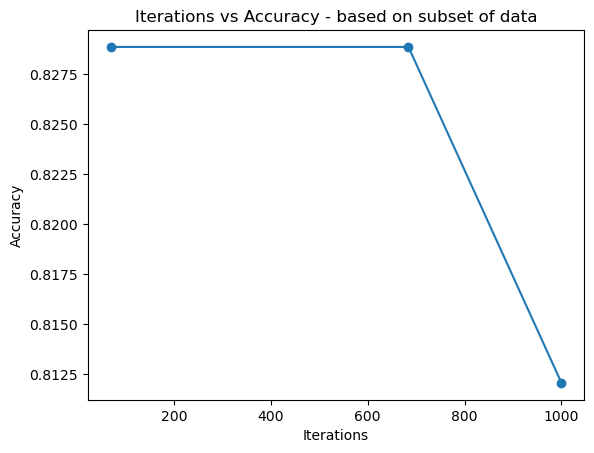

In [9]:
lrs = [0.001,0.01,0.1]
its = []
logAccs =[]
for rates in lrs:
    logReg2 = LogisticRegression(rates,1000)
    accuracyLog,iterations = evaluate_acc(Xsubset,ySubset,logReg2,0.4)
    its.append(iterations)
    logAccs.append(accuracyLog)
plt.plot(its, logAccs, label='Line 1', marker='o')
plt.title('Iterations vs Accuracy - based on subset of data')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

In [10]:
#accuracy vs training size
subsetIndexesOP = np.random.choice(len(y), int(0.01*len(y)), replace=False)
Xsubset1 = X_new[subsetIndexesOP]
ySubset1 = y[subsetIndexesOP]

subsetIndexesFP = np.random.choice(len(y), int(0.05*len(y)), replace=False)
Xsubset2 = X_new[subsetIndexesFP]
ySubset2 = y[subsetIndexesFP]

subsetIndexesTP = np.random.choice(len(y), int(0.1*len(y)), replace=False)
Xsubset3 = X_new[subsetIndexesTP]
ySubset3 = y[subsetIndexesTP]

logReg3 = LogisticRegression(0.01,1000)
kNearest3 = KNN(5)

accuracyLogOP = evaluate_acc(Xsubset1,ySubset1,logReg3,0.001)
accuracyKNNOP = evaluate_acc(Xsubset1,ySubset1, kNearest3, None)

accuracyLogFP = evaluate_acc(Xsubset2,ySubset2,logReg3,0.001)
accuracyKNNFP = evaluate_acc(Xsubset2,ySubset2, kNearest3, None)

accuracyLogTP = evaluate_acc(Xsubset3,ySubset3,logReg3,0.001)
accuracyKNNTP = evaluate_acc(Xsubset3,ySubset3, kNearest3, None)

print("Accuracy with 1% of training values for logistic regression is: ",accuracyLogOP," and for KNN: ",accuracyKNNOP)
print("Accuracy with 5% of training values for logistic regression is: ",accuracyLogFP," and for KNN: ",accuracyKNNFP)
print("Accuracy with 10% of training values for logistic regression is: ",accuracyLogTP," and for KNN: ",accuracyKNNTP)

Accuracy with 1% of training values for logistic regression is:  (0.8108695652173913, 1000)  and for KNN:  0.7782608695652175
Accuracy with 5% of training values for logistic regression is:  (0.8543103448275863, 1000)  and for KNN:  0.8310344827586207
Accuracy with 10% of training values for logistic regression is:  (0.8390086206896552, 1000)  and for KNN:  0.8142241379310344
